# 분류 신경망 실습

In [1]:
import numpy as np
import tensorflow as tf

# 일관된 결과값이 나오도록 하는 랜덤시드 
np.random.seed(0)
tf.random.set_seed(0)

## 와인데이터 로드

In [2]:
from sklearn import datasets
raw_wine = datasets.load_wine()

#feature, target data

X = raw_wine.data
y = raw_wine.target 

## 피처 갯수 확인. 신경망 생성시 사용됨 

In [3]:
X.shape

(178, 13)

## 타깃데이터 종류 확인. 회귀 vs 분류 판별

In [4]:
set(y)

{0, 1, 2}

## 타깃데이터 -> 분류. 원핫인코딩 

In [5]:
from tensorflow.keras.utils import to_categorical
y_hot = to_categorical(y)
y_hot

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

## 트레이닝/ 테스트 분할

In [6]:
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te = train_test_split(X, y_hot, random_state=0)

## 신경망 생성

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation

n_feat = X_tn.shape[1]
n_class = len(set(y))
epo = 30

model = Sequential()

model.add(Dense(20, input_dim=n_feat))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(n_class))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                280       
_________________________________________________________________
batch_normalization (BatchNo (None, 20)                80        
_________________________________________________________________
activation (Activation)      (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 63        
_________________________________________________________________
activation_1 (Activation)    (None, 3)                 0         
Total params: 423
Trainable params: 383
Non-trainable params: 40
_________________________________________________________________


## 모형 컴파일

In [10]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

## 신경망 학습

In [11]:
hist = model.fit(X_tn, y_tn, epochs=epo, batch_size=5)

Epoch 1/30
27/27 [==============================] - 0s 460us/step - loss: 1.0471 - accuracy: 0.4355
Epoch 2/30
27/27 [==============================] - 0s 460us/step - loss: 0.9325 - accuracy: 0.5871
Epoch 3/30
27/27 [==============================] - 0s 422us/step - loss: 0.9115 - accuracy: 0.6756
Epoch 4/30
27/27 [==============================] - 0s 460us/step - loss: 0.7561 - accuracy: 0.6725
Epoch 5/30
27/27 [==============================] - 0s 460us/step - loss: 0.7057 - accuracy: 0.7448
Epoch 6/30
27/27 [==============================] - 0s 460us/step - loss: 0.8857 - accuracy: 0.6128
Epoch 7/30
27/27 [==============================] - 0s 460us/step - loss: 0.7723 - accuracy: 0.7147
Epoch 8/30
27/27 [==============================] - 0s 460us/step - loss: 0.7140 - accuracy: 0.7327
Epoch 9/30
27/27 [==============================] - 0s 460us/step - loss: 0.7402 - accuracy: 0.7042
Epoch 10/30
27/27 [==============================] - 0s 422us/step - loss: 0.6906 - accuracy: 0.7155

## 모형평가

In [16]:
model.evaluate(X_tn, y_tn)

5/5 [==============================] - 0s 496us/step - loss: 1.0682 - accuracy: 0.5789


[1.0682215690612793, 0.5789473652839661]

In [17]:
model.evaluate(X_tn, y_tn)[1]

5/5 [==============================] - 0s 499us/step - loss: 1.0682 - accuracy: 0.5789


0.5789473652839661

In [18]:
model.evaluate(X_te, y_te)

2/2 [==============================] - 0s 999us/step - loss: 1.2528 - accuracy: 0.5556


[1.252758502960205, 0.5555555820465088]

In [19]:
model.evaluate(X_te, y_te)[1]

2/2 [==============================] - 0s 1ms/step - loss: 1.2528 - accuracy: 0.5556


0.5555555820465088

## 시각화

In [23]:
import numpy as np
epoch = np.arange(1, epo+1)
accuracy = hist.history['accuracy']
loss = hist.history['loss']

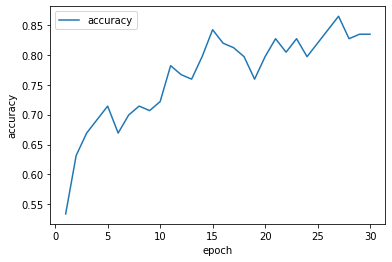

In [25]:
import matplotlib.pyplot as plt 
plt.plot(epoch, accuracy, label = 'accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

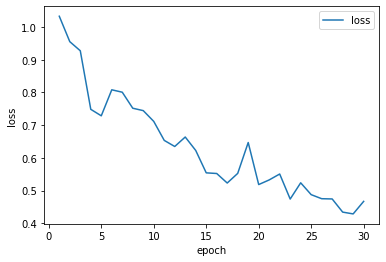

In [26]:
import matplotlib.pyplot as plt 
plt.plot(epoch, loss, label = 'loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()